# Trump's tone to Congress

We're going to reproduce [Trump Sounds a Different Tone in First Address to Congress](https://www.nytimes.com/interactive/2017/02/28/upshot/trump-sounds-different-tone-in-first-address-to-congress.html) from the Upshot.

**Datasource 1:** The [NRC Emotional Lexicon](http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm), a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive). The annotations were manually done by crowdsourcing. 

**Datasource 2:** A database of [Trump speeches](https://github.com/PedramNavid/trump_speeches), one speech per file. There are a lot of GitHub repositories of Trump speeches, but this one is better than the vast majority.

**Datasource 3:** State of the Union addresses taken from  the website Presidency. Scraped Trump 2016: http://www.presidency.ucsb.edu/2016_election_speeches.php?candidate=45&campaign=2016TRUMP&doctype=5000

In [8]:
import pandas as pd
%matplotlib inline

# Reading in the EmoLex

I'm just copying this from the other notebook! It's the one at the very bottom that does a lot of reshaping. I think it's the easiest to work with.

In [9]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


## Reading in Trump's speeches

### Get a list of all of the files

In [28]:
filenames = pd.read_csv("trump_elections.csv")


In [29]:
filenames

,"Address Accepting the Presidential Nomination at the Republican National Convention in Cleveland, Ohio; July 21, 2016","Address to the National Guard Association of the United States 138th General Conference & Exhibition at the Baltimore Convention Center in Baltimore, Maryland; September 12, 2016","Excerpts of Remarks at Aaron Bessant Park in Panama City, Florida; October 11, 2016","News Conference in Doral, Florida; July 27, 2016","Remarks Announcing Candidacy for President in New York City; June 16, 2015","Remarks Introducing Governor Mike Pence as the 2016 Republican Vice Presidential Nominee in New York City; July 16, 2016","Remarks at Aston Community Center in Aston, Pennsylvania; September 13, 2016","Remarks at Erie Insurance Arena in Erie, Pennsylvania; August 12, 2016","Remarks at Great Faith International Ministries in Detroit, Michigan; September 3, 2016","Remarks at Henderson Pavilion in Henderson, Nevada; October 5, 2016",...,"Remarks in New York City Accepting Election as the 45th President of the United States; November 9, 2016","Remarks in Virginia Beach, Virginia; July 11, 2016","Remarks on Foreign Policy at the National Press Club in Washington, DC; April 27, 2016","Remarks on Immigration at the Phoenix Convention Center in Phoenix, Arizona; August 31, 2016","Remarks on Obamacare in Valley Forge, Pennsylvania; November 1, 2016","Remarks on Proposals for the First 100 Days in Office at the Eisenhower Complex in Gettysburg, Pennsylvania; October 22, 2016","Remarks to the 11th Annual Values Voter Summit in Washington, DC Omni Shoreham Hotel, Washington, D.C.; September 9, 2016","Remarks to the American Legion in Cincinnati, Ohio; September 1, 2016","Remarks to the Detroit Economic Club; August 8, 2016","Remarks to the Economic Club of New York at the Waldorf Astoria in New York City; September 15, 2016"
0,"July 21, 2016","September 12, 2016","October 11, 2016","July 27, 2016","June 16, 2015","July 16, 2016","September 13, 2016","August 12, 2016","September 3, 2016","October 5, 2016",...,"November 9, 2016","July 11, 2016","April 27, 2016","August 31, 2016","November 1, 2016","October 22, 2016","September 9, 2016","September 1, 2016","August 8, 2016","September 15, 2016"
1,"Friends, delegates and fellow Americans: I hum...",Thank you. I am honored to be here today. Let ...,The Hillary Clinton documents released by Wiki...,"Donald Trump. So, it's been 235 days since cro...",Trump: Wow. Whoa. That is some group of people...,"Thank you, everybody. Great honor. Great honor...","Thank you. I want to applaud my daughter, Ivan...","Thank you. Thank you, everybody. Thank you. Un...","""Thank you. That's so nice. Thank you.""Well, t...",Thank you. It is great to be here in the city ...,...,"Thank you. Thank you very much, everyone. [app...",Thank you.I'd like to thank Chairman Jeff Mill...,"Thank you for the opportunity to speak to you,...","Wow. Thank you. That's a lot of people, Phoeni...",Thank you very much. Thank you. [applause]I wo...,Thank you. [applause]Thank you very much thank...,"Thank you. Thank you very much. Oh, Jon. Jon i...",Thank you all so much. What an honor and a pri...,Thank you for the invitation to speak to you t...,Thank you for the opportunity to speak with yo...
2,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.p

In [30]:
speeches_df = filenames.T.reset_index().rename(columns={'index': 'name'})
speeches_df.head()

,name,0,1,2
0,Address Accepting the Presidential Nomination ...,"July 21, 2016","Friends, delegates and fellow Americans: I hum...",http://www.presidency.ucsb.edu/ws/index.php?pi...
1,Address to the National Guard Association of t...,"September 12, 2016",Thank you. I am honored to be here today. Let ...,http://www.presidency.ucsb.edu/ws/index.php?pi...
2,Excerpts of Remarks at Aaron Bessant Park in P...,"October 11, 2016",The Hillary Clinton documents released by Wiki...,http://www.presidency.ucsb.edu/ws/index.php?pi...
3,"News Conference in Doral, Florida; July 27, 2016","July 27, 2016","Donald Trump. So, it's been 235 days since cro...",http://www.presidency.ucsb.edu/ws/index.php?pi...
4,Remarks Announcing Candidacy for President in ...,"June 16, 2015",Trump: Wow. Whoa. That is some group of people...,http://www.presidency.ucsb.edu/ws/index.php?pi...


In [37]:
speeches_df.columns = ['name', 'date', 'content', 'filename']
speeches_df

,name,date,content,filename
0,Address Accepting the Presidential Nomination ...,"July 21, 2016","Friends, delegates and fellow Americans: I hum...",http://www.presidency.ucsb.edu/ws/index.php?pi...
1,Address to the National Guard Association of t...,"September 12, 2016",Thank you. I am honored to be here today. Let ...,http://www.presidency.ucsb.edu/ws/index.php?pi...
2,Excerpts of Remarks at Aaron Bessant Park in P...,"October 11, 2016",The Hillary Clinton documents released by Wiki...,http://www.presidency.ucsb.edu/ws/index.php?pi...
3,"News Conference in Doral, Florida; July 27, 2016","July 27, 2016","Donald Trump. So, it's been 235 days since cro...",http://www.presidency.ucsb.edu/ws/index.php?pi...
4,Remarks Announcing Candidacy for President in ...,"June 16, 2015",Trump: Wow. Whoa. That is some group of people...,http://www.presidency.ucsb.edu/ws/index.php?pi...
5,Remarks Introducing Governor Mike Pence as the...,"July 16, 2016","Thank you, everybody. Great honor. Great honor...",http://www.presidency.ucsb.edu/ws/index.php?pi...
6,"Remarks at Aston Community Center in Aston, Pe...","September 13, 2016","Thank you. I want to applaud my daughter, Ivan...",http://www.presidency.ucsb.edu/ws/index.php?pi...
7,"Remarks at Erie Insurance Arena in Erie, Penns...","August 12, 2016","Thank you. Thank you, everybody. Thank you. Un...",http://www.presidency.ucsb.edu/ws/index.php?pi...
8,Remarks at Great Faith International Ministrie...,"September 3, 2016","""Thank you. That's so nice. Thank you.""Well, t...",http://www.presidency.ucsb.edu/ws/index.php?pi...
9,"Remarks at Henderson Pavilion in Henderson, Ne...","October 5, 2016",Thank you. It is great to be here in the city ...,http://www.presidency.ucsb.edu/ws/index.php?pi...


# How does Trump before winning the elections sound?

Let's analyze by counting words.

We would use the code below to count all of his words. **Do we really want all of them?**

```python
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
matrix = vec.fit_transform(speeches_df['content'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()
```

In [36]:
emolex_df['word'].head(3)

0      aback
1     abacus
2    abandon
Name: word, dtype: object

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(speeches_df['content'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.000807,0.000807,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.002506,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000677,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# wordcount_df.sort_values(by='america', ascending=False).head(5)

In [16]:
# wordcount_df[['murder', 'america', 'great', 'prison', 'immigrant']].head(2)

In [39]:
# bad bad bad = 100% negative
# bad bad evil evil = 50% bad + 50% evil = 100% negative
# bad fish evil fish = 25% bad + 25% evil = 50% negative 
# awful % + hate % + bad % + worse % + evil % = negative %

wordcount_df[['awful', 'hate', 'bad', 'worse', 'evil']].sum(axis=1)

0     0.005650
1     0.000000
2     0.000000
3     0.014153
4     0.007442
5     0.002430
6     0.000000
7     0.011992
8     0.000000
9     0.001511
10    0.004367
11    0.007948
12    0.001709
13    0.003540
14    0.001592
15    0.002976
16    0.005025
17    0.007979
18    0.002066
19    0.000000
20    0.002535
21    0.009298
22    0.001873
23    0.004785
24    0.000000
25    0.002008
26    0.000000
27    0.000000
28    0.000000
29    0.000000
        ...   
44    0.003704
45    0.002991
46    0.002247
47    0.012953
48    0.003401
49    0.006631
50    0.000000
51    0.000000
52    0.003810
53    0.005051
54    0.001626
55    0.001658
56    0.003831
57    0.000000
58    0.004111
59    0.004525
60    0.001506
61    0.002165
62    0.007926
63    0.002041
64    0.002950
65    0.002976
66    0.002304
67    0.001754
68    0.001692
69    0.005102
70    0.013943
71    0.000000
72    0.002128
73    0.001166
Length: 74, dtype: float64

In [21]:
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [22]:
emolex_df[emolex_df.anger == 1].head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0
17,abhor,1,0,1,1,0,1,0,0,0,0
18,abhorrent,1,0,1,1,0,1,0,0,0,0
27,abolish,1,0,0,0,0,1,0,0,0,0


In [40]:
# Get your list of angry words
angry_words = emolex_df[emolex_df.anger == 1]['word']
angry_words.head()

3       abandoned
4     abandonment
17          abhor
18      abhorrent
27        abolish
Name: word, dtype: object

In [41]:
wordcount_df[angry_words].head()

,abandoned,abandonment,abhor,abhorrent,abolish,abomination,abuse,accursed,accusation,accused,...,wreck,wrecked,wretch,wring,wrongdoing,wrongful,wrongly,yell,yelp,youth
0,0.000807,0.0,0.0,0.0,0.000807,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000807
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000677,0.0,0.0,0.0,0.000000,0.0,0.000677,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [42]:
# Only give me the columns of angry words
speeches_df['anger'] = wordcount_df[angry_words].sum(axis=1)
speeches_df.head(3)

,name,date,content,filename,anger
0,Address Accepting the Presidential Nomination ...,"July 21, 2016","Friends, delegates and fellow Americans: I hum...",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.105730
1,Address to the National Guard Association of t...,"September 12, 2016",Thank you. I am honored to be here today. Let ...,http://www.presidency.ucsb.edu/ws/index.php?pi...,0.107769
2,Excerpts of Remarks at Aaron Bessant Park in P...,"October 11, 2016",The Hillary Clinton documents released by Wiki...,http://www.presidency.ucsb.edu/ws/index.php?pi...,0.106061


In [43]:
# Get your list of positive words
positive_words = emolex_df[emolex_df.positive == 1]['word']


# Get your list of sadness words
sadness_words = emolex_df[emolex_df.sadness == 1]['word']
sadness_words.head()

# Get your list of surprise words
surprise_words = emolex_df[emolex_df.surprise == 1]['word']
surprise_words.head()

# Get your list of disgust words
disgust_words = emolex_df[emolex_df.disgust == 1]['word']
#disgust_words.head()

# Get your list of anticipation words
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']
#anticipation_words.head()

# Get your list of negative words
negative_words = emolex_df[emolex_df.negative == 1]['word']
negative_words.head()


# Get your list of joy words
joy_words = emolex_df[emolex_df.joy == 1]['word']
joy_words.head()

# Get your list of trust words
trust_words = emolex_df[emolex_df.trust == 1]['word']
trust_words.head()


# Get your list of fear words
fear_words = emolex_df[emolex_df.fear == 1]['word']
fear_words.head()



2         abandon
3       abandoned
4     abandonment
13      abduction
17          abhor
Name: word, dtype: object

In [45]:
# Only give me the columns of angry words
speeches_df['positivity'] = wordcount_df[positive_words].sum(axis=1)


speeches_df['joy'] = wordcount_df[joy_words].sum(axis=1)


speeches_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



speeches_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

speeches_df['trust'] = wordcount_df[trust_words].sum(axis=1)


speeches_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


speeches_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)


speeches_df['negative'] = wordcount_df[negative_words].sum(axis=1)


speeches_df['fear'] = wordcount_df[fear_words].sum(axis=1)




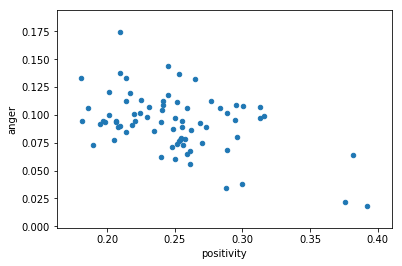

In [47]:
speeches_df.plot(x='positivity', y='anger', kind='scatter')

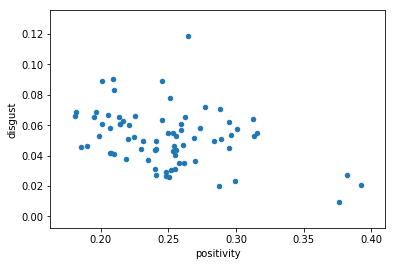

In [48]:
speeches_df.plot(x='positivity', y='disgust', kind='scatter')

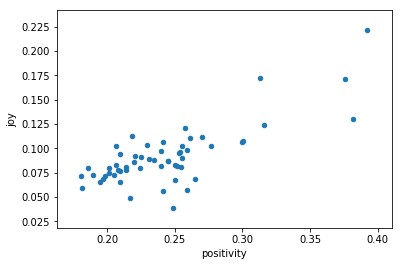

In [35]:
speeches_df.plot(x='positivity', y='joy', kind='scatter')

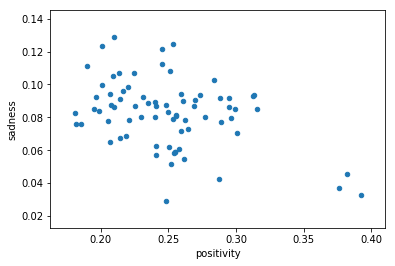

In [49]:
speeches_df.plot(x='positivity', y='sadness', kind='scatter')

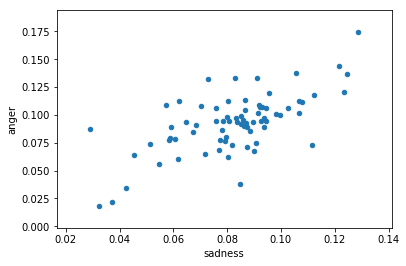

In [50]:
speeches_df.plot(x='sadness', y='anger', kind='scatter')

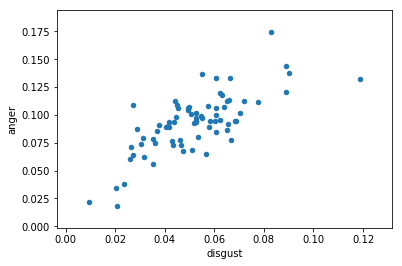

In [51]:
speeches_df.plot(x='disgust', y='anger', kind='scatter')

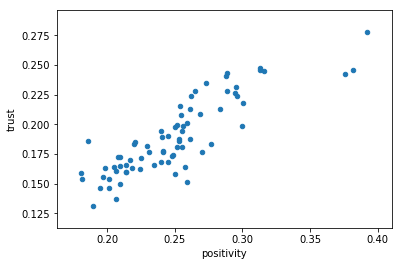

In [52]:
speeches_df.plot(x='positivity', y='trust', kind='scatter')

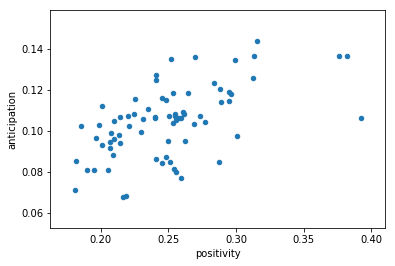

In [53]:
speeches_df.plot(x='positivity', y='anticipation', kind='scatter')

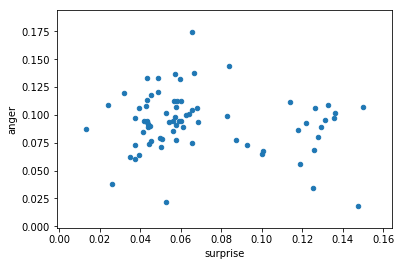

In [54]:
speeches_df.plot(x='surprise', y='anger', kind='scatter')

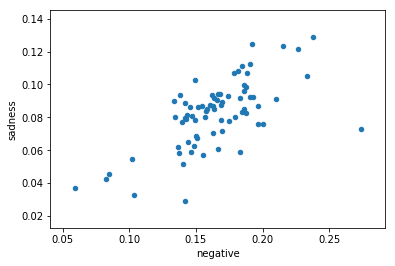

In [55]:
speeches_df.plot(x='negative', y='sadness', kind='scatter')

# Reading in the Trump speeches



In [62]:
import glob

filenames = glob.glob("trump_speeches-master/data/speech*")
filenames[:5]

['trump_speeches-master/data/speech_41.txt',
 'trump_speeches-master/data/speech_55.txt',
 'trump_speeches-master/data/speech_54.txt',
 'trump_speeches-master/data/speech_40.txt',
 'trump_speeches-master/data/speech_42.txt']

In [63]:
president_speeches_df = [open(filename).read() for filename in filenames]
len(president_speeches_df)

56

### Create a dataframe out of the results

Instead of passing a list of dictionaries to `pd.DataFrame`, we pass a dictionary that says "here are all of the filenames" and "here are all of the texts" and it puts each list into a column.

In [64]:
president_speeches_df = pd.DataFrame({
    'text': speeches,
    'filename': filenames
})
president_speeches_df.head(3)

,filename,text
0,trump_speeches-master/data/speech_41.txt,Remarks at the Reno-Sparks Convention Center i...
1,trump_speeches-master/data/speech_55.txt,Remarks in New York City Accepting Election as...
2,trump_speeches-master/data/speech_54.txt,Remarks at the Phoenix Convention Center in Ph...


### Add a column for the name 

We don't have a name for these, so we'll just use the filename.

In [65]:
president_speeches_df['name'] = president_speeches_df['filename']
president_speeches_df.head()

,filename,text,name
0,trump_speeches-master/data/speech_41.txt,Remarks at the Reno-Sparks Convention Center i...,trump_speeches-master/data/speech_41.txt
1,trump_speeches-master/data/speech_55.txt,Remarks in New York City Accepting Election as...,trump_speeches-master/data/speech_55.txt
2,trump_speeches-master/data/speech_54.txt,Remarks at the Phoenix Convention Center in Ph...,trump_speeches-master/data/speech_54.txt
3,trump_speeches-master/data/speech_40.txt,"Remarks at Henderson Pavilion in Henderson, Ne...",trump_speeches-master/data/speech_40.txt
4,trump_speeches-master/data/speech_42.txt,Excerpts of Remarks at Aaron Bessant Park in P...,trump_speeches-master/data/speech_42.txt


In [66]:
president_speeches_df['name'] = president_speeches_df['text'].apply(lambda value: value.split("\n")[0])
president_speeches_df['content'] = president_speeches_df['text'].apply(lambda value: value.split("\n")[1])
del president_speeches_df['text']
president_speeches_df.head(2)

,filename,name,content
0,trump_speeches-master/data/speech_41.txt,Remarks at the Reno-Sparks Convention Center i...,Thank you. I am so thrilled to be here in Reno...
1,trump_speeches-master/data/speech_55.txt,Remarks in New York City Accepting Election as...,"Thank you. Thank you very much, everyone. [app..."


# How do State of the Unions sound?

Let's analyze by counting words.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(president_speeches_df['content'])
vocab = vec.get_feature_names()
president_speeches_df_wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
president_speeches_df_wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Get your list of positive words
positive_words = emolex_df[emolex_df.positive == 1]['word']

# Only give me the columns of angry words
president_speeches_df['positivity'] = president_speeches_df_wordcount_df[positive_words].sum(axis=1)
president_speeches_df.head(3)

,filename,name,content,positivity
0,trump_speeches-master/data/speech_41.txt,Remarks at the Reno-Sparks Convention Center i...,Thank you. I am so thrilled to be here in Reno...,0.240000
1,trump_speeches-master/data/speech_55.txt,Remarks in New York City Accepting Election as...,"Thank you. Thank you very much, everyone. [app...",0.392330
2,trump_speeches-master/data/speech_54.txt,Remarks at the Phoenix Convention Center in Ph...,"The silent majority is back. In 10 days, we ar...",0.209184


In [69]:
# Get your list of positive words
anger_words = emolex_df[emolex_df.anger == 1]['word']

# Only give me the columns of angry words
president_speeches_df['anger'] = president_speeches_df_wordcount_df[anger_words].sum(axis=1)
president_speeches_df.head(3)

,filename,name,content,positivity,anger
0,trump_speeches-master/data/speech_41.txt,Remarks at the Reno-Sparks Convention Center i...,Thank you. I am so thrilled to be here in Reno...,0.240000,0.093333
1,trump_speeches-master/data/speech_55.txt,Remarks in New York City Accepting Election as...,"Thank you. Thank you very much, everyone. [app...",0.392330,0.017699
2,trump_speeches-master/data/speech_54.txt,Remarks at the Phoenix Convention Center in Ph...,"The silent majority is back. In 10 days, we ar...",0.209184,0.137755


In [74]:
# Only give me the columns of angry words
president_speeches_df['positivity'] = president_speeches_df_wordcount_df[positive_words].sum(axis=1)


president_speeches_df['joy'] = president_speeches_df_wordcount_df[joy_words].sum(axis=1)


president_speeches_df['disgust'] = president_speeches_df_wordcount_df[disgust_words].sum(axis=1)



president_speeches_df['surprise'] = president_speeches_df_wordcount_df[surprise_words].sum(axis=1)

president_speeches_df['trust'] = president_speeches_df_wordcount_df[trust_words].sum(axis=1)


president_speeches_df['anticipation'] = president_speeches_df_wordcount_df[anticipation_words].sum(axis=1)


president_speeches_df['sadness'] = president_speeches_df_wordcount_df[sadness_words].sum(axis=1)


president_speeches_df['negative'] = president_speeches_df_wordcount_df[negative_words].sum(axis=1)


president_speeches_df['fear'] = president_speeches_df_wordcount_df[fear_words].sum(axis=1)




# Comparing Election vs Presidency

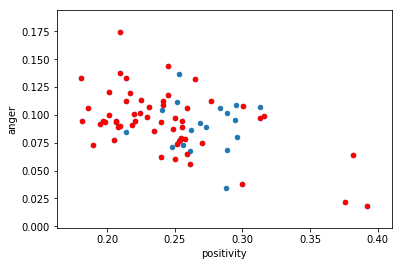

In [75]:
ax = speeches_df.plot(x='positivity', y= 'anger', kind='scatter')
president_speeches_df.plot(x='positivity', y= 'anger', kind='scatter', c='red', ax=ax)

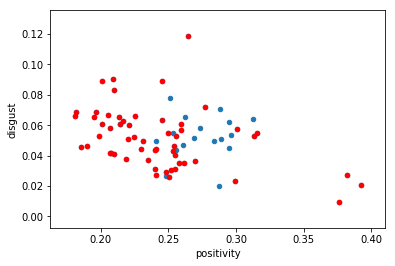

In [76]:
ax = speeches_df.plot(x='positivity', y='disgust', kind='scatter')
president_speeches_df.plot(x='positivity', y='disgust', kind='scatter', c='red', ax=ax)

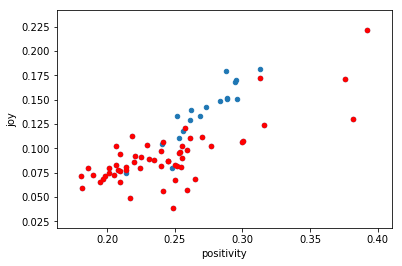

In [77]:
ax = speeches_df.plot(x='positivity', y='joy', kind='scatter')
president_speeches_df.plot(x='positivity', y='joy', kind='scatter', c='red', ax=ax)

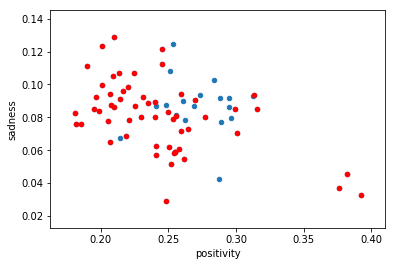

In [78]:
ax = speeches_df.plot(x='positivity', y='sadness', kind='scatter')
president_speeches_df.plot(x='positivity', y='sadness', kind='scatter', c='red', ax=ax)

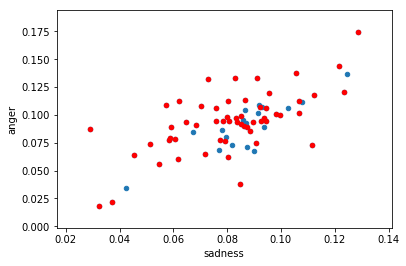

In [79]:
ax = speeches_df.plot(x='sadness', y='anger', kind='scatter')
president_speeches_df.plot(x='sadness', y='anger', kind='scatter', c='red', ax=ax)

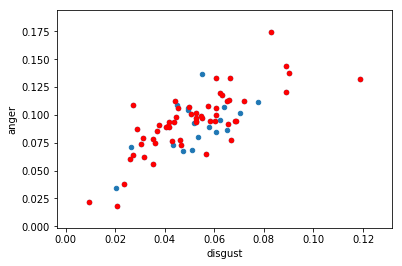

In [80]:
ax = speeches_df.plot(x='disgust', y='anger', kind='scatter')
president_speeches_df.plot(x='disgust', y='anger', kind='scatter', c='red', ax=ax)

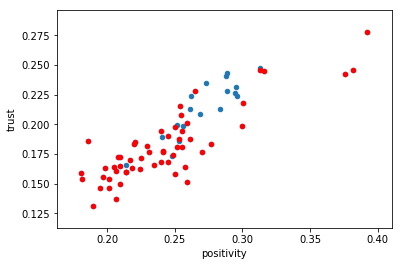

In [81]:
ax = speeches_df.plot(x='positivity', y='trust', kind='scatter')
president_speeches_df.plot(x='positivity', y='trust', kind='scatter', c='red', ax=ax)

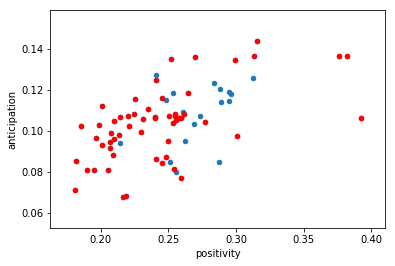

In [82]:
ax = speeches_df.plot(x='positivity', y='anticipation', kind='scatter')
president_speeches_df.plot(x='positivity', y='anticipation', kind='scatter', c='red', ax=ax)

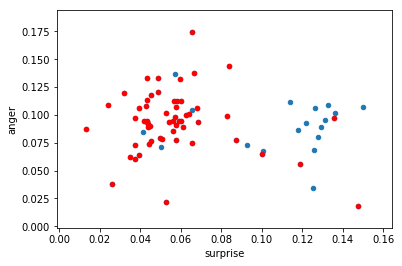

In [83]:
ax = speeches_df.plot(x='surprise', y='anger', kind='scatter')
president_speeches_df.plot(x='surprise', y='anger', kind='scatter', c='red', ax=ax)

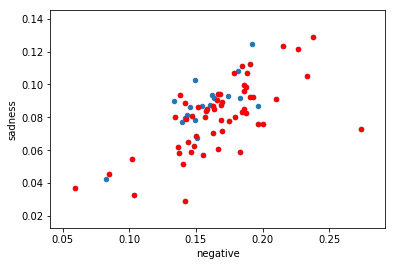

In [84]:
ax = speeches_df.plot(x='negative', y='sadness', kind='scatter')
president_speeches_df.plot(x='negative', y='sadness', kind='scatter', c='red', ax=ax)

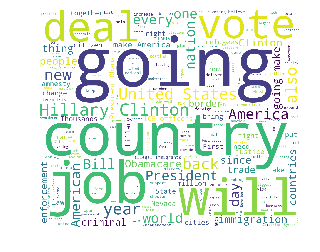

people            1.777542
country           1.593649
applause          1.046863
make              0.823964
government        0.572568
back              0.561737
don               0.549201
president         0.547611
time              0.538655
world             0.530133
state             0.514255
trade             0.500354
united            0.458655
trump             0.439889
nation            0.419574
plan              0.405332
years             0.403321
vote              0.379625
put               0.365405
money             0.358515
year              0.344734
campaign          0.337279
change            0.330439
deal              0.326098
work              0.322865
bring             0.313495
future            0.312791
tax               0.311709
foreign           0.308037
job               0.302877
illegal           0.301870
system            0.293139
today             0.291334
end               0.289741
immigration       0.287690
administration    0.287005
million           0.282365
s

In [71]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                         stopwords=STOPWORDS,
                         background_color='white',
                         width=1200,
                         height=1000).generate(speeches[0])

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
 
wordcount_df.sum().sort_values(ascending=False).head(50)

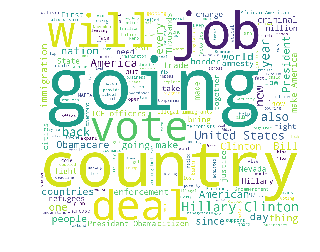

people            1.253800
country           1.213277
make              0.662788
government        0.491234
president         0.460386
time              0.400523
state             0.400246
world             0.392135
trade             0.387366
back              0.382011
nation            0.368521
united            0.346696
trump             0.316490
plan              0.310644
put               0.300187
year              0.291960
campaign          0.289702
don               0.277193
years             0.266539
applause          0.265869
vote              0.265453
foreign           0.261744
money             0.251401
future            0.242603
change            0.236224
illegal           0.235653
tax               0.235438
deal              0.233415
today             0.232422
immigration       0.230786
end               0.229620
job               0.225626
bring             0.224095
system            0.224086
fight             0.222666
energy            0.221593
work              0.221038
a

In [72]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                         stopwords=STOPWORDS,
                         background_color='white',
                         width=1200,
                         height=1000).generate(speeches[0])

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
 
president_speeches_df_wordcount_df.sum().sort_values(ascending=False).head(50)